# `scikit-learn-whiskers`
https://github.com/ayaranitram/scikit-learn-whiskers

# import

In [1]:
from sklearn_whiskers import WhiskerOutliers, StandardOutliers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading synthetic data

In [3]:
data = pd.read_csv('./test/data/synthetic_data.csv')

## exploring the demo data
The data used in this demo has been generated randomly following a gaussian distribution and then a few outlier values has been manually added.

In [4]:
data

,A,B
0,-5.751340,18
1,0.183419,34
2,-1.739405,23
3,-0.407147,12
4,-0.813476,29
5,0.601784,25
6,0.130457,21
7,0.315318,3
8,0.716157,29
9,-0.703382,24


In [5]:
data.describe()

,A,B
count,30.000000,30.000000
mean,0.169563,25.700000
std,3.392163,19.145811
min,-8.178300,-25.000000
25%,-0.793515,18.500000
50%,-0.332636,25.000000
75%,0.561415,29.000000
max,9.579174,99.000000


## Visualizing the data
The boxplots below illustrate the oultier values that is intended to be eliminated from the data:

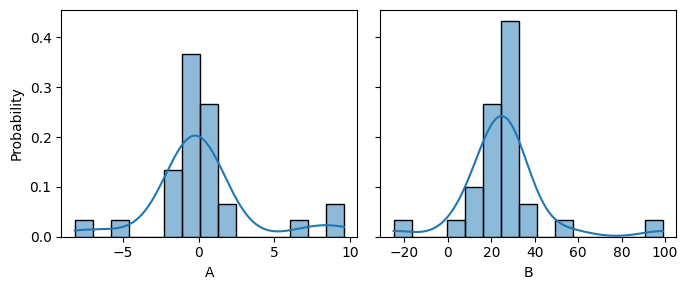

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
sns.histplot(data, x='A', bins=15, kde=True, stat='probability', ax=ax[0])
sns.histplot(data, x='B', bins=15, kde=True, stat='probability', ax=ax[1])
plt.tight_layout()
plt.show()

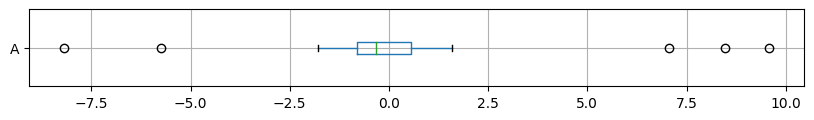

In [7]:
data.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

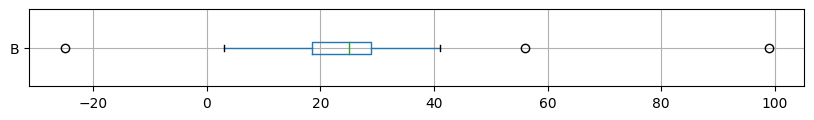

In [8]:
data.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

# `WhiskerOutliers` instances
## Parameters:
Only two parameters for these instances:

### `threshold`
- `float`, `int` or `array-like` of size 2 indicating different threshold for lower and upper limits.
- default=`3.0`
- indicate the lenght of the whisker, values below or above the whisker will be considered outliers.

### `mark_nan`
- `bool`
- default=`True`
- if set to `True` the original values are returned with the outliers changed to NumPy.NaN

### `add_indicator`
- `bool`
- default=`False`
- if set to `True` new column(s) will be append indicating where an observation is an outlier:

### `distinct`
- `bool`
- default=`True`
- change the behaviour of `add_indicator`:
    - `distinct=True`:
        - **-1** for outliers < the minimum whisker, 
        - **0** for not outliers,
        - **1** for outliers > the maximum whisker.
    - `distinct=False`:
        - **-1** for outliers, 
        - **1** for not outliers (inliers),

## Attribuites
- **threshold**: the threshold, in terms of _inter-quantile range_, used to identifity the outliers.
- **mark_nan**: `True` or `False` as requested by the user, to change or not the outliers by _NumPy.NaN_.
- **add_indicator**: `True` or `False` as requested by the user, to return or not new column(s) indicating the outlier values.  
- **distinct**: `True` or `False` as requested by the user, to change the behaviour of *add_indicator*.
- **min_**: The minimum value that is not considered outlier.
- **max_**: The maximum value that is not considered outlier.

In [9]:
wo = WhiskerOutliers()

## Methods
### `fit(X, [y])`
Fit the instance on `X`
- `X`: pandas Series, DataFrame or array-like (like numpy array).
- `y`: ignored, accepted for convention and compatibility.
  
To calculate and retain in the instance the minimum and maximum values, according the _iqr_ and input `threshold`, that identify the outliers.  

How are the _iqr_, _minimum_ and _maximum_ calculated?
- The _iqr_ is calculated as the absolute difference between the 3rd quartile and the 1st quartile of the input data `X`.
- The _minimum_ is the 1st quartile (quantile 0.25) minus `threshold` times the _iqr_
- The _maximum_ is the 3rd quartile (quantile 0.75) plus `threshold` times the _iqr_

In [10]:
wo.fit(data)

WhiskerOutliers()

### `transform(X, [y])`
Transform the dataset `X`, replacing by `nunpy.nan` the outlier values, according to the limits defined by the `.fit` method.

In [11]:
transformed = wo.transform(data)

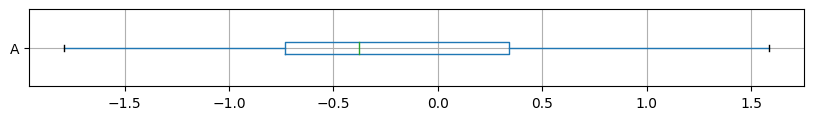

In [12]:
transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

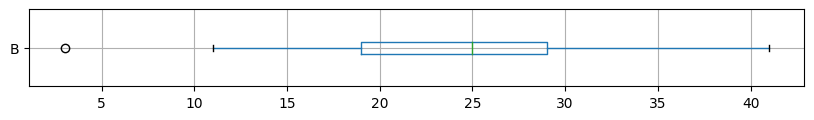

In [13]:
transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

### `fit_transform(X, [y])`
Fit and apply transformation to `X` and return the transformed data.
- `X`: pandas Series, DataFrame or array-like (like numpy array).
- `y`: ignored, accepted for convention and compatibility.

In [14]:
wo = WhiskerOutliers()
fit_and_transformed = wo.fit_transform(data)

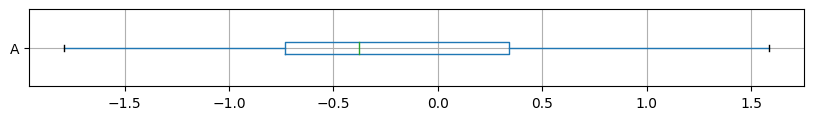

In [15]:
fit_and_transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

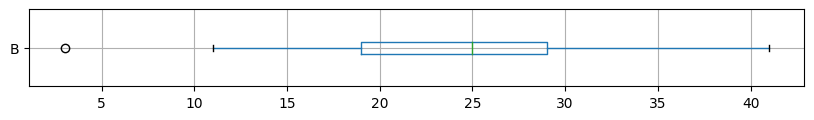

In [16]:
fit_and_transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

### `get_params()`
Get parameters for this estimator.  
Returns a dictionary of parameters mapped to their values.

In [17]:
wo.get_params()

{'threshold': 1.5, 'add_indicator': False}

### `set_params(**params)`
Set the parameters of this estimator.
- `**params` is a dictionary of the estimator parameters
Returns the estimator instance.

In [18]:
WhiskerOutliers(threshold=1.0, add_indicator=True).fit_transform(data)

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,0
1,0.183419,34.0,0,0
2,-1.739405,23.0,0,0
3,-0.407147,12.0,0,0
4,-0.813476,29.0,0,0
5,0.601784,25.0,0,0
6,0.130457,21.0,0,0
7,0.315318,NaN,0,-1
8,0.716157,29.0,0,0
9,-0.703382,24.0,0,0


In [19]:
WhiskerOutliers().set_params(**{'threshold': 1.0, 'add_indicator': True}).fit_transform(data)

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,0
1,0.183419,34.0,0,0
2,-1.739405,23.0,0,0
3,-0.407147,12.0,0,0
4,-0.813476,29.0,0,0
5,0.601784,25.0,0,0
6,0.130457,21.0,0,0
7,0.315318,NaN,0,-1
8,0.716157,29.0,0,0
9,-0.703382,24.0,0,0


## `fit` and `transform` with non-default parameters
### `add_indicator=True`
In this example the `threshold` and `add_indicator` parameters has been changed from their default values:

In [20]:
wo = WhiskerOutliers(threshold=1.5, add_indicator=True)

In [21]:
wo.fit(data)

WhiskerOutliers(add_indicator=True)

In [22]:
transformed = wo.transform(data)

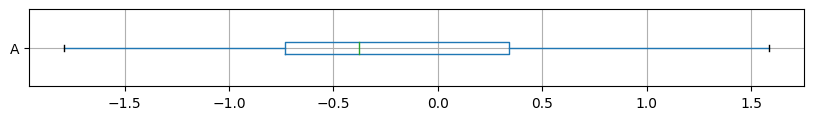

In [23]:
transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

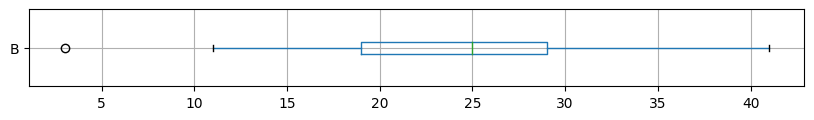

In [24]:
transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

With the paramenter **`add_indicator`=True** new column(s) with the suffix *_outlier* is(are) appended to the transformed dataset:

In [25]:
transformed

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,0
1,0.183419,34.0,0,0
2,-1.739405,23.0,0,0
3,-0.407147,12.0,0,0
4,-0.813476,29.0,0,0
5,0.601784,25.0,0,0
6,0.130457,21.0,0,0
7,0.315318,3.0,0,0
8,0.716157,29.0,0,0
9,-0.703382,24.0,0,0


These new indicator columns can be used to retain information about the removed values on machine learning pipelines or to identify the outlier values for plotting or other analysis:

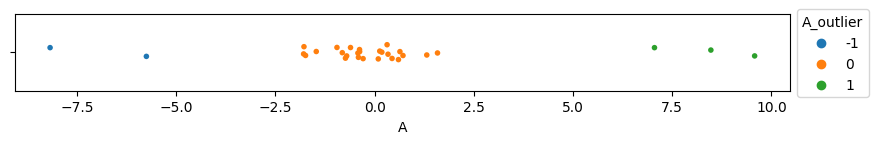

In [26]:
plt.figure(figsize=(10, 1))
ax = sns.stripplot(data, x="A", size=4, hue=transformed.A_outlier, palette=sns.color_palette(n_colors=3))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.15))
plt.show()

### `add_indicator=True` and `distinct=False`
In this example the `threshold`, `add_indicator` and `distinct` parameters has been changed from their default values:

In [27]:
wo = WhiskerOutliers(threshold=1.5, add_indicator=True, distinct=False)

In [28]:
wo.fit(data)

WhiskerOutliers(add_indicator=True)

In [29]:
transformed = wo.transform(data)

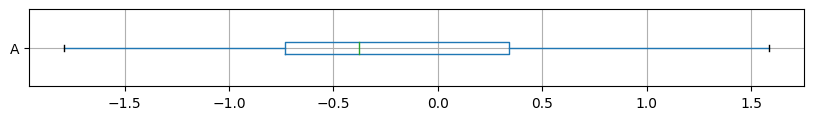

In [30]:
transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

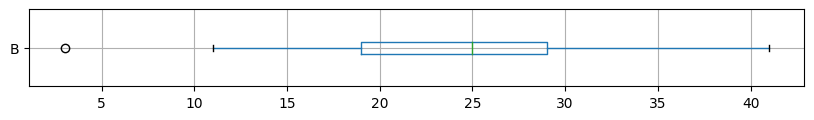

In [31]:
transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

With the paramenter **`add_indicator`=True** new column(s) with the suffix *_outlier* is(are) appended to the transformed dataset:

In [32]:
transformed

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,1
1,0.183419,34.0,1,1
2,-1.739405,23.0,1,1
3,-0.407147,12.0,1,1
4,-0.813476,29.0,1,1
5,0.601784,25.0,1,1
6,0.130457,21.0,1,1
7,0.315318,3.0,1,1
8,0.716157,29.0,1,1
9,-0.703382,24.0,1,1


### `mark_nan=False` and `add_indicator=True`
In this example the `threshold`, `mark_nan` and `add_indicator` has been changed from their default values:

In [33]:
wo = WhiskerOutliers(threshold=1.5, mark_nan=False, add_indicator=True)

In [34]:
wo.fit(data)

WhiskerOutliers(add_indicator=True)

In [35]:
transformed = wo.transform(data)

With the paramenter **`mark_nan`=False** and **`add_indicator`=True** only the outlier indicators is returned in the dataset:

In [36]:
transformed

,A,B
0,-1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# `StandardOutliers` instances

## Parameters:
Only two parameters for these instances:  

### `threshold`  
- `float`, `int` or `array-like` of size 2 indicating different threshold for lower and upper limits.  
- default=`3.0`  
- indicate the lenght of the whisker, values below or above the whisker will be considered outliers.  
  
### `mark_nan`
- `bool`
- default=`True`
- if set to `True` the original values are returned with the outliers changed to NumPy.NaN

### `add_indicator`
- `bool`
- default=`False`
- if set to `True` new column(s) will be append indicating where an observation is an outlier:

### `distinct`
- `bool`
- default=`True`
- change the behaviour of `add_indicator`:
    - `distinct=True`:
        - **-1** for outliers < the minimum whisker, 
        - **0** for not outliers,
        - **1** for outliers > the maximum whisker.
    - `distinct=False`:
        - **-1** for outliers, 
        - **1** for not outliers (inliers),

## Attribuites
- **threshold**: the threshold, in terms of _inter-quantile range_, used to identifity the outliers.
- **mark_nan**: `True` or `False` as requested by the user, to change or not the outliers by _NumPy.NaN_.
- **add_indicator**: `True` or `False` as requested by the user, to return or not new column(s) indicating the outlier values.  
- **distinct**: `True` or `False` as requested by the user, to change the behaviour of *add_indicator*.
- **min_**: The minimum value that is not considered outlier.
- **max_**: The maximum value that is not considered outlier.

In [37]:
wo = WhiskerOutliers()

## Methods
### `fit(X, [y])`
Fit the instance on `X`
- `X`: pandas Series, DataFrame or array-like (like numpy array).
- `y`: ignored, accepted for convention and compatibility.
  
To calculate and retain in the instance the minimum and maximum values, according the _iqr_ and input `threshold`, that identify the outliers.  

How are the _iqr_, _minimum_ and _maximum_ calculated?
- The _iqr_ is calculated as the absolute difference between the 3rd quartile and the 1st quartile of the input data `X`.
- The _minimum_ is the 1st quartile (quantile 0.25) minus `threshold` times the _iqr_
- The _maximum_ is the 3rd quartile (quantile 0.75) plus `threshold` times the _iqr_

In [38]:
wo.fit(data)

WhiskerOutliers()

### `transform(X, [y])`
Transform the dataset `X`, replacing by `nunpy.nan` the outlier values, according to the limits defined by the `.fit` method.

In [39]:
transformed = wo.transform(data)

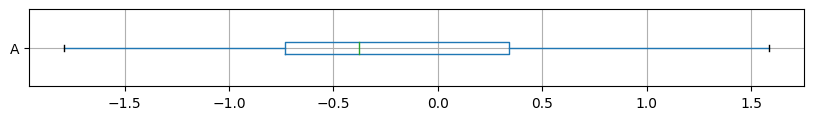

In [40]:
transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

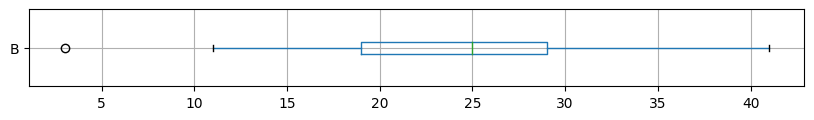

In [41]:
transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

### `fit_transform(X, [y])`
Fit and apply transformation to `X` and return the transformed data.
- `X`: pandas Series, DataFrame or array-like (like numpy array).
- `y`: ignored, accepted for convention and compatibility.

In [42]:
wo = WhiskerOutliers()
fit_and_transformed = wo.fit_transform(data)

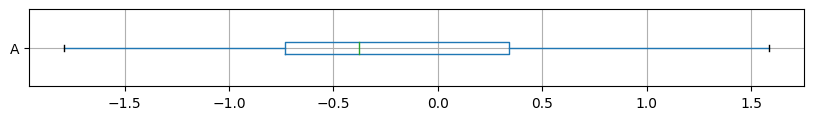

In [43]:
fit_and_transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

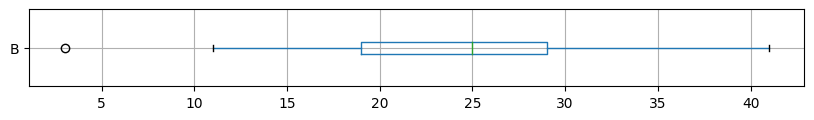

In [44]:
fit_and_transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

### `get_params()`
Get parameters for this estimator.  
Returns a dictionary of parameters mapped to their values.

In [45]:
wo.get_params()

{'threshold': 1.5, 'add_indicator': False}

### `set_params(**params)`
Set the parameters of this estimator.
- `**params` is a dictionary of the estimator parameters
Returns the estimator instance.

In [46]:
WhiskerOutliers(threshold=1.0, add_indicator=True).fit_transform(data)

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,0
1,0.183419,34.0,0,0
2,-1.739405,23.0,0,0
3,-0.407147,12.0,0,0
4,-0.813476,29.0,0,0
5,0.601784,25.0,0,0
6,0.130457,21.0,0,0
7,0.315318,NaN,0,-1
8,0.716157,29.0,0,0
9,-0.703382,24.0,0,0


In [47]:
WhiskerOutliers().set_params(**{'threshold': 1.0, 'add_indicator': True}).fit_transform(data)

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,0
1,0.183419,34.0,0,0
2,-1.739405,23.0,0,0
3,-0.407147,12.0,0,0
4,-0.813476,29.0,0,0
5,0.601784,25.0,0,0
6,0.130457,21.0,0,0
7,0.315318,NaN,0,-1
8,0.716157,29.0,0,0
9,-0.703382,24.0,0,0


## `fit` and `transform` with non-default parameters
In this example the `threshold`and `add_indicator` parameters has been changed from their default values:

In [48]:
wo = WhiskerOutliers(threshold=1.5, add_indicator=True)

In [49]:
wo.fit(data)

WhiskerOutliers(add_indicator=True)

In [50]:
transformed = wo.transform(data)

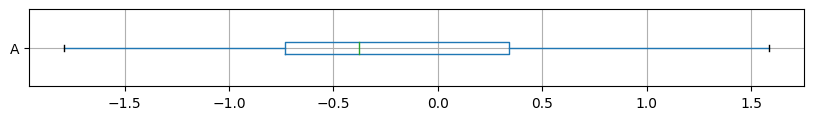

In [51]:
transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

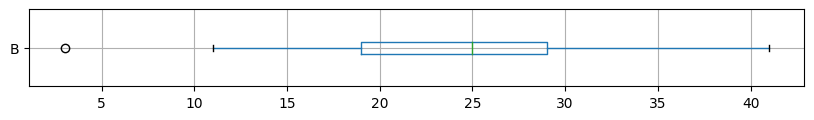

In [52]:
transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

With the paramenter **`add_indicator`=True** new column(s) with the suffix *_outlier* is(are) appended to the transformed dataset:

In [53]:
transformed

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,0
1,0.183419,34.0,0,0
2,-1.739405,23.0,0,0
3,-0.407147,12.0,0,0
4,-0.813476,29.0,0,0
5,0.601784,25.0,0,0
6,0.130457,21.0,0,0
7,0.315318,3.0,0,0
8,0.716157,29.0,0,0
9,-0.703382,24.0,0,0


These new indicator columns can be used to retain information about the removed values on machine learning pipelines or to identify the outlier values for plotting or other analysis:

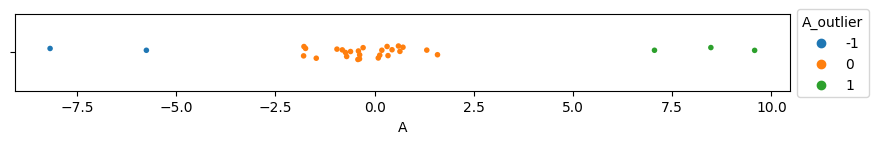

In [54]:
plt.figure(figsize=(10, 1))
ax = sns.stripplot(data, x="A", size=4, hue=transformed.A_outlier, palette=sns.color_palette(n_colors=3))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.15))
plt.show()

# Testing and demostrations
The previous examples were run using a pandas.DataFrame as input data, the following lines are intented to test the functionalities using padas.Series and numpy.array:
  
## using pandas.Series as input
### with `add_indicator=False` as per default

In [55]:
column_A = data['A']

In [56]:
WhiskerOutliers().fit_transform(column_A)

0          NaN
1     0.183419
2    -1.739405
3    -0.407147
4    -0.813476
5     0.601784
6     0.130457
7     0.315318
8     0.716157
9    -0.703382
10   -0.376354
11    0.638981
12   -1.469733
13   -1.788557
14    0.093530
15   -0.947836
16   -0.379213
17   -0.420326
18    0.440307
19   -0.288918
20   -0.606306
21    1.315781
22   -1.779490
23   -0.733635
24    0.338525
25    1.585907
26         NaN
27         NaN
28         NaN
29         NaN
Name: A, dtype: float64

### with `add_indicator=True`

In [57]:
WhiskerOutliers(add_indicator=True).fit_transform(column_A)

,A,A_outlier
0,NaN,-1
1,0.183419,0
2,-1.739405,0
3,-0.407147,0
4,-0.813476,0
5,0.601784,0
6,0.130457,0
7,0.315318,0
8,0.716157,0
9,-0.703382,0


## using numpy.array as input
- an array matrix of shape (30, 2), the 2 columns of the data
- a vector array of shape (30,) that must be reshaped accordingly to (-1, 1)

In [58]:
array_matrix = data.values
print('shape of array_matrix', array_matrix.shape)
array_A = data['A'].values
print('shape of flatten array', array_A.shape)

shape of array_matrix (30, 2)
shape of flatten array (30,)


### using default parameters
- with *array_matrix*

In [59]:
WhiskerOutliers().fit_transform(array_matrix)

array([[        nan, 18.        ],
       [ 0.18341866, 34.        ],
       [-1.73940501, 23.        ],
       [-0.40714737, 12.        ],
       [-0.81347565, 29.        ],
       [ 0.6017841 , 25.        ],
       [ 0.13045701, 21.        ],
       [ 0.31531835,  3.        ],
       [ 0.71615739, 29.        ],
       [-0.70338173, 24.        ],
       [-0.37635435, 32.        ],
       [ 0.63898084, 41.        ],
       [-1.46973312, 17.        ],
       [-1.78855726, 23.        ],
       [ 0.09353018, 27.        ],
       [-0.9478361 , 30.        ],
       [-0.3792133 ,         nan],
       [-0.42032595, 25.        ],
       [ 0.4403073 , 14.        ],
       [-0.28891821, 31.        ],
       [-0.60630559, 20.        ],
       [ 1.31578068, 27.        ],
       [-1.77949007, 29.        ],
       [-0.73363492, 11.        ],
       [ 0.33852455, 25.        ],
       [ 1.58590748, 27.        ],
       [        nan, 27.        ],
       [        nan, 17.        ],
       [        nan,

- with vector array, it is mandatory to reshape the flatten vector accordingly.

In [60]:
WhiskerOutliers().fit_transform(array_A.reshape(-1, 1))

array([[        nan],
       [ 0.18341866],
       [-1.73940501],
       [-0.40714737],
       [-0.81347565],
       [ 0.6017841 ],
       [ 0.13045701],
       [ 0.31531835],
       [ 0.71615739],
       [-0.70338173],
       [-0.37635435],
       [ 0.63898084],
       [-1.46973312],
       [-1.78855726],
       [ 0.09353018],
       [-0.9478361 ],
       [-0.3792133 ],
       [-0.42032595],
       [ 0.4403073 ],
       [-0.28891821],
       [-0.60630559],
       [ 1.31578068],
       [-1.77949007],
       [-0.73363492],
       [ 0.33852455],
       [ 1.58590748],
       [        nan],
       [        nan],
       [        nan],
       [        nan]])

### requesting to add indicator
- with *array_matrix*

In [61]:
WhiskerOutliers(add_indicator=True).fit_transform(array_matrix)

array([[        nan, 18.        , -1.        ,  0.        ],
       [ 0.18341866, 34.        ,  0.        ,  0.        ],
       [-1.73940501, 23.        ,  0.        ,  0.        ],
       [-0.40714737, 12.        ,  0.        ,  0.        ],
       [-0.81347565, 29.        ,  0.        ,  0.        ],
       [ 0.6017841 , 25.        ,  0.        ,  0.        ],
       [ 0.13045701, 21.        ,  0.        ,  0.        ],
       [ 0.31531835,  3.        ,  0.        ,  0.        ],
       [ 0.71615739, 29.        ,  0.        ,  0.        ],
       [-0.70338173, 24.        ,  0.        ,  0.        ],
       [-0.37635435, 32.        ,  0.        ,  0.        ],
       [ 0.63898084, 41.        ,  0.        ,  0.        ],
       [-1.46973312, 17.        ,  0.        ,  0.        ],
       [-1.78855726, 23.        ,  0.        ,  0.        ],
       [ 0.09353018, 27.        ,  0.        ,  0.        ],
       [-0.9478361 , 30.        ,  0.        ,  0.        ],
       [-0.3792133 ,    

- with flatten vector array

In [62]:
WhiskerOutliers(add_indicator=True).fit_transform(array_A.reshape(-1, 1))

array([[        nan, -1.        ],
       [ 0.18341866,  0.        ],
       [-1.73940501,  0.        ],
       [-0.40714737,  0.        ],
       [-0.81347565,  0.        ],
       [ 0.6017841 ,  0.        ],
       [ 0.13045701,  0.        ],
       [ 0.31531835,  0.        ],
       [ 0.71615739,  0.        ],
       [-0.70338173,  0.        ],
       [-0.37635435,  0.        ],
       [ 0.63898084,  0.        ],
       [-1.46973312,  0.        ],
       [-1.78855726,  0.        ],
       [ 0.09353018,  0.        ],
       [-0.9478361 ,  0.        ],
       [-0.3792133 ,  0.        ],
       [-0.42032595,  0.        ],
       [ 0.4403073 ,  0.        ],
       [-0.28891821,  0.        ],
       [-0.60630559,  0.        ],
       [ 1.31578068,  0.        ],
       [-1.77949007,  0.        ],
       [-0.73363492,  0.        ],
       [ 0.33852455,  0.        ],
       [ 1.58590748,  0.        ],
       [        nan,  1.        ],
       [        nan,  1.        ],
       [        nan,

## used inside a Pipeline

In [63]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

removing the outliers, but not marking them with a new attribute:

In [64]:
pipe = Pipeline(
    steps=[("outliers", WhiskerOutliers()),
           ("imputer", KNNImputer()),
           ("scaler", StandardScaler()), 
           ("model", LinearRegression())]
)

In [65]:
pipe.fit(X=data[['A']], y=data.B)

Pipeline(steps=[('outliers', WhiskerOutliers()), ('imputer', KNNImputer()),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [66]:
pipe.predict(X=data[['A']])

array([25.7       , 26.08403891, 24.35533381, 25.55309344, 25.18778602,
       26.46016828, 26.036424  , 26.20262267, 26.56299502, 25.28676541,
       25.58077776, 26.49360983, 24.59778099, 24.31114373, 26.00322512,
       25.06698992, 25.57820743, 25.54124531, 26.31499337, 25.65938679,
       25.37404123, 27.10208337, 24.31929554, 25.25956643, 26.22348609,
       27.34493953, 25.7       , 25.7       , 25.7       , 25.7       ])

In [67]:
data['predicted'] = pipe.predict(X=data[['A']])

removing the outliers and marking them with a new attribute:

In [68]:
pipe = Pipeline(
    steps=[("outliers", WhiskerOutliers(add_indicator=True)),
           ("imputer", KNNImputer()),
           ("scaler", StandardScaler()), 
           ("model", LinearRegression())]
)

In [69]:
pipe.fit(X=data[['A']], y=data.B)

Pipeline(steps=[('outliers', WhiskerOutliers(add_indicator=True)),
                ('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [70]:
data['with_indicator'] = pipe.predict(X=data[['A']])

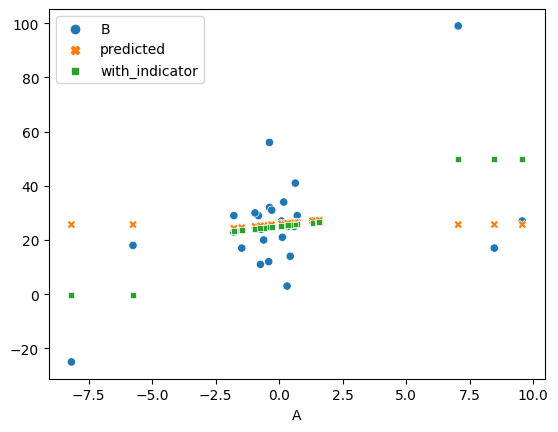

In [71]:
sns.scatterplot(data.set_index("A"))
plt.show()